# Audi cars price prediction 

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**[seaborn,matplotlib:data visualization],[pandas,numpy:calculation and data management]**

# DATASET

In [2]:
df= pd.read_csv('audi.csv')

**Audi car dataset**


In [3]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [4]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


# Data Visualization

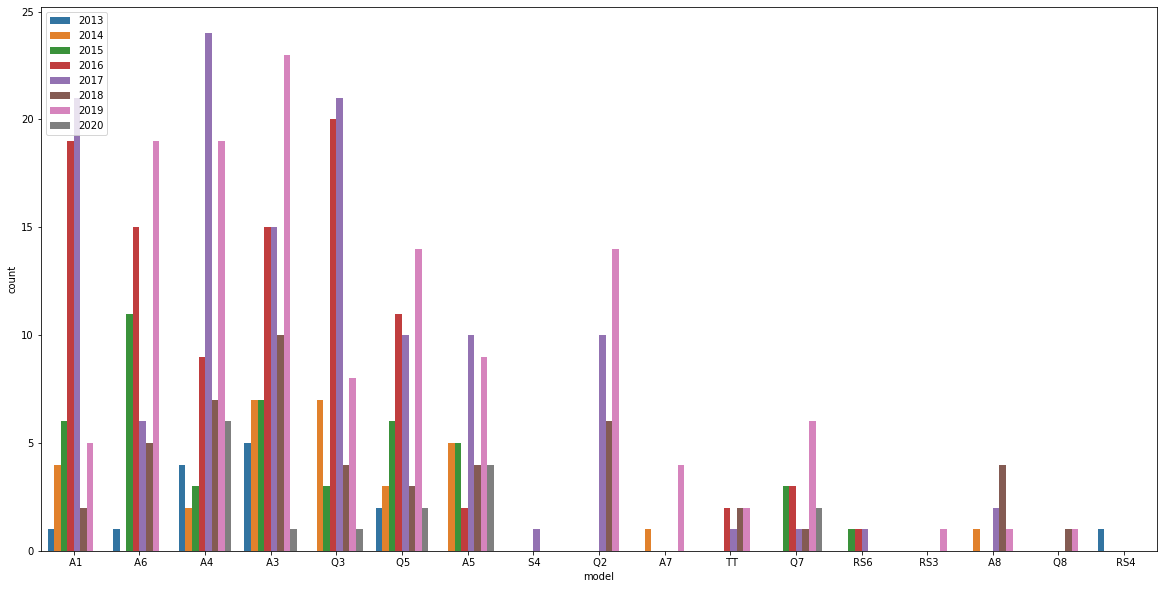

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x='model',data=df[:500],hue='year')
plt.legend()


> **visualizing count of the number of models released throughout the years till 2020**

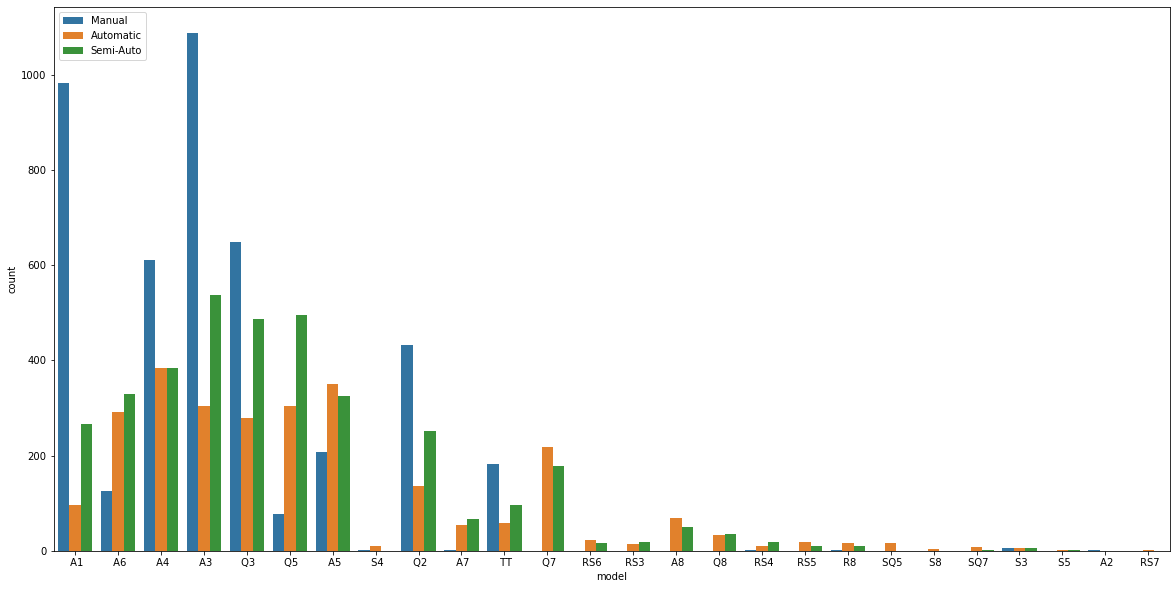

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='model',data=df,hue='transmission')
plt.legend()


> **visualizing count of model types based on transmission feature**

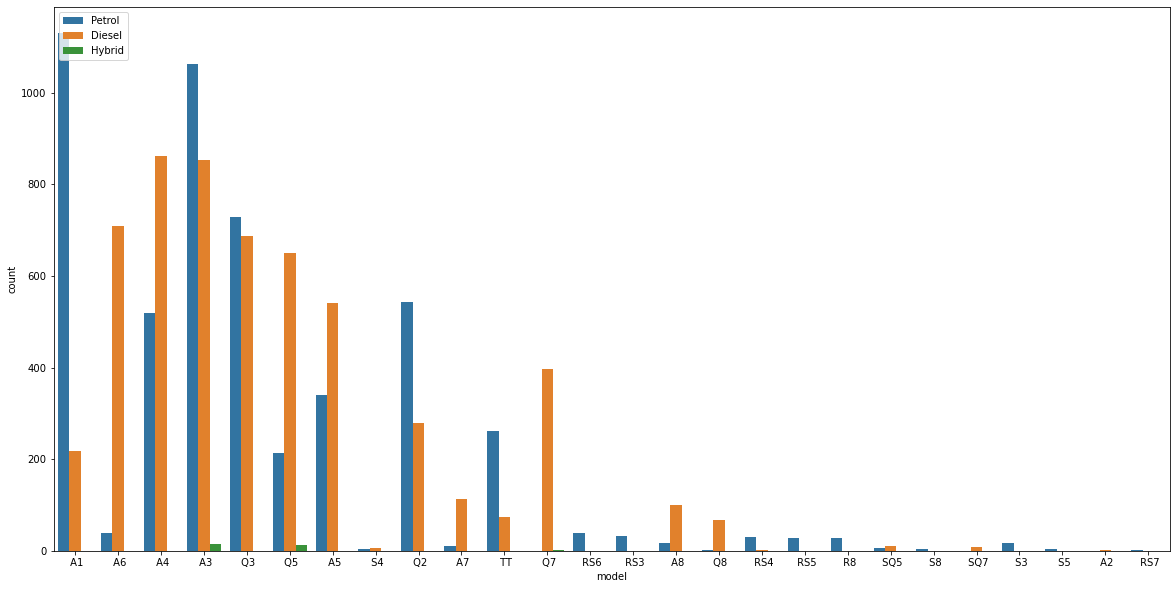

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='model',data=df,hue='fuelType')
plt.legend()


> **visualizing count of model types based on FuelType feature**

<AxesSubplot:>

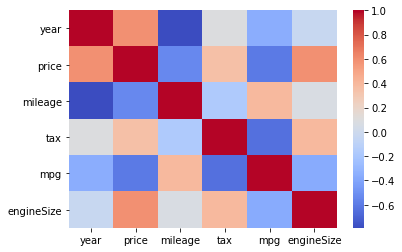

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm')


> **visualizing a correlation between all numerical columns from the dataset using seaborn heatmap**

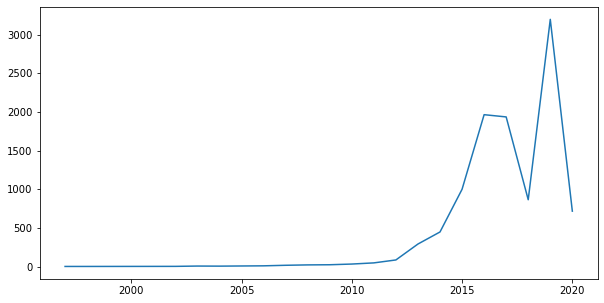

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df['year'].value_counts().sort_index())


> **Trend of the number of cars released by Audi company**

<AxesSubplot:>

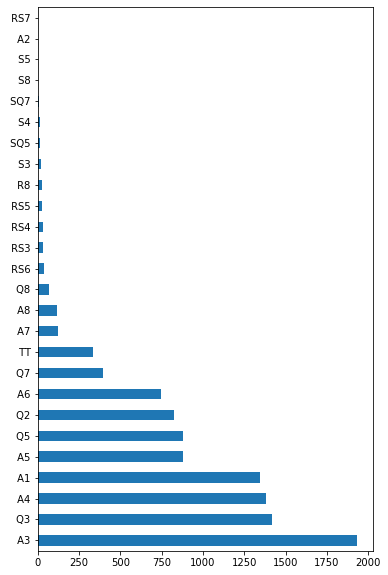

In [12]:
df['model'].value_counts().head(30).plot(kind='barh', figsize=(6,10))


> **count of the different types of models**

<AxesSubplot:>

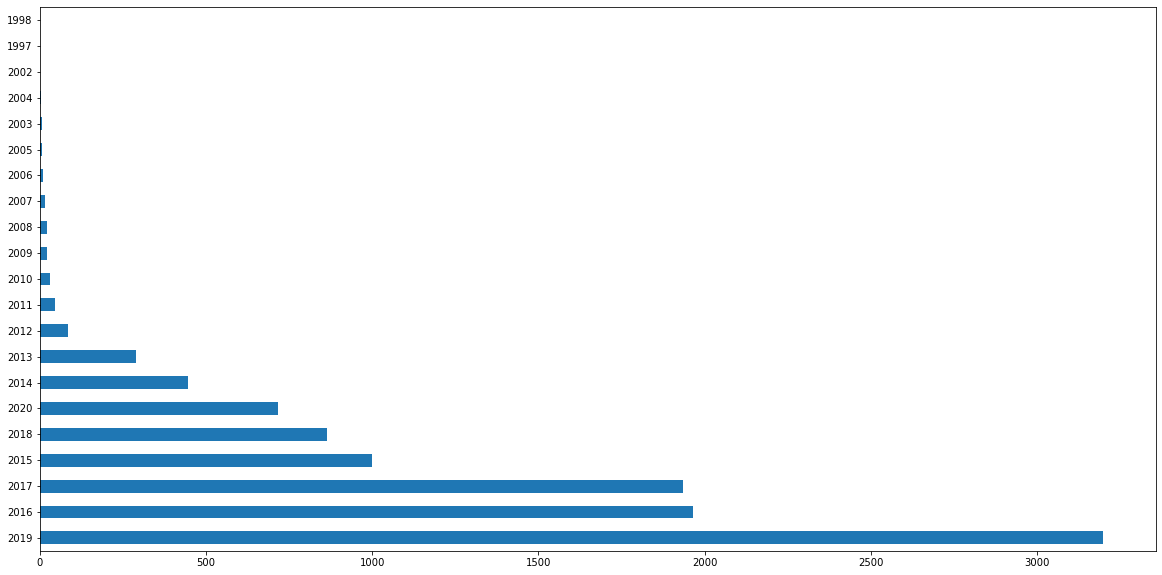

In [13]:
df['year'].value_counts().head(30).plot(kind='barh', figsize=(20,10))


> **count of the number of cars manufactured by the company based on year**

# Data Cleaning

In [14]:
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [15]:
df.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
10663,False,False,False,False,False,False,False,False,False
10664,False,False,False,False,False,False,False,False,False
10665,False,False,False,False,False,False,False,False,False
10666,False,False,False,False,False,False,False,False,False


**checking for Null values**

<AxesSubplot:>

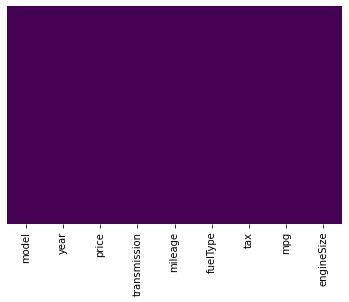

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)


**visualization of Null values using seaborn heatmap:No Null values**

In [17]:
df.drop(['model'],axis=1,inplace=True)

> **Removing model column from df dataframe** (model name doesn't contribute in predicting price of the car)

# Feature Engineering

In [18]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,2019,17300,Manual,1998,Petrol,145,49.6,1.0


**Process:converting categorical columns to numerical columns**

In [19]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

checking unique values for transmission column

In [20]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

checking unique values for fuelType column

> #        pandas.get_dummies(...)


**Convert categorical variable into dummy/indicator variables**

In [21]:
transmissiond=pd.get_dummies(df['transmission'],drop_first=True)

In [22]:
transmissiond

,Manual,Semi-Auto
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
10663,1,0
10664,1,0
10665,1,0
10666,0,0


In [23]:
fuelTyped=pd.get_dummies(df['fuelType'],drop_first=True)

In [24]:
fuelTyped

,Hybrid,Petrol
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
10663,0,1
10664,0,1
10665,0,1
10666,0,1


In [25]:
df=pd.concat([df,transmissiond,fuelTyped],axis=1)

**Concatenating the dataframe with new numerical columns**

In [26]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manual,Semi-Auto,Hybrid,Petrol
0,2017,12500,Manual,15735,Petrol,150,55.4,1.4,1,0,0,1
1,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,0,0,0,0
2,2016,11000,Manual,29946,Petrol,30,55.4,1.4,1,0,0,1
3,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,0,0,0,0
4,2019,17300,Manual,1998,Petrol,145,49.6,1.0,1,0,0,1


In [27]:
Y=df['price']
Y.head()

0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

Storing price column for training and tesing purpose

In [28]:
df.drop(['transmission','fuelType'],axis=1,inplace=True)

**Removing categorical columns as they have been replaced by respective numerical columns**

In [29]:
df.head()

,year,price,mileage,tax,mpg,engineSize,Manual,Semi-Auto,Hybrid,Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,1


In [30]:
df.drop(['price'],axis=1,inplace=True)

**Removing the column which is to predicted**

In [31]:
df.head()

,year,mileage,tax,mpg,engineSize,Manual,Semi-Auto,Hybrid,Petrol
0,2017,15735,150,55.4,1.4,1,0,0,1
1,2016,36203,20,64.2,2.0,0,0,0,0
2,2016,29946,30,55.4,1.4,1,0,0,1
3,2017,25952,145,67.3,2.0,0,0,0,0
4,2019,1998,145,49.6,1.0,1,0,0,1


In [32]:
df.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'Manual', 'Semi-Auto',
       'Hybrid', 'Petrol'],
      dtype='object')

**Available columns for prediction model**

> # Dataset splitting and standardizing 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y)

Dataset is split using train_test_split()  method

In [35]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)


Dataset is standardized using StandardScaler

In [36]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8001, 9), (2667, 9), (8001,), (2667,))

# Building Neural Network Model

> # Neural Network Model from sklearn

In [37]:
from sklearn.neural_network import MLPClassifier

An MLP (or Artificial Neural Network - ANN) with a single hidden layer 

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(512,), verbose = 1, learning_rate='adaptive', learning_rate_init=0.0001,activation='relu',solver='adam',n_iter_no_change=100,warm_start=True)

In [39]:
mlp

MLPClassifier(hidden_layer_sizes=(512,), learning_rate='adaptive',
              learning_rate_init=0.0001, n_iter_no_change=100, verbose=1,
              warm_start=True)

> # Neural Network Model from tensorflow

In [40]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers

**importing modules required for tensorflow model**

In [41]:
model = keras.Sequential()
model.add(Dense(512, activation='relu',input_dim=9))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 177,665
Trainable params: 177,665
Non-trainable params: 0
_________________________________________________________________


# Running/Fitting the Models

> # Model from sklearn

In [43]:
mlp.fit(X_train2, Y_train)

Iteration 1, loss = 7.89657285
Iteration 2, loss = 7.79451215
Iteration 3, loss = 7.69366267
Iteration 4, loss = 7.58101965
Iteration 5, loss = 7.45714843
Iteration 6, loss = 7.32417887
Iteration 7, loss = 7.18569052
Iteration 8, loss = 7.04794772
Iteration 9, loss = 6.91656105
Iteration 10, loss = 6.79581907
Iteration 11, loss = 6.68974678
Iteration 12, loss = 6.59586001
Iteration 13, loss = 6.51421949
Iteration 14, loss = 6.44394478
Iteration 15, loss = 6.38116801
Iteration 16, loss = 6.32439301
Iteration 17, loss = 6.27298313
Iteration 18, loss = 6.22434614
Iteration 19, loss = 6.17859847
Iteration 20, loss = 6.13538471
Iteration 21, loss = 6.09437993
Iteration 22, loss = 6.05568947
Iteration 23, loss = 6.01731920
Iteration 24, loss = 5.98113845
Iteration 25, loss = 5.94634817
Iteration 26, loss = 5.91316922
Iteration 27, loss = 5.88115380
Iteration 28, loss = 5.85015411
Iteration 29, loss = 5.82019094
Iteration 30, loss = 5.79072641
Iteration 31, loss = 5.76262911
Iteration 32, los

c:\users\chaku\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(512,), learning_rate='adaptive',
              learning_rate_init=0.0001, n_iter_no_change=100, verbose=1,
              warm_start=True)

> # Model from tensorflow

In [44]:
model.fit(X_train2,Y_train, batch_size=64, epochs = 1000)

Epoch 1/1000
126/126 [==============================] - 0s 2ms/step - loss: 74.4351
Epoch 2/1000
126/126 [==============================] - 0s 2ms/step - loss: 17.0206
Epoch 3/1000
126/126 [==============================] - 0s 2ms/step - loss: 12.1795
Epoch 4/1000
126/126 [==============================] - 0s 2ms/step - loss: 11.3794
Epoch 5/1000
126/126 [==============================] - 0s 2ms/step - loss: 11.1704
Epoch 6/1000
126/126 [==============================] - 0s 2ms/step - loss: 11.0006
Epoch 7/1000
126/126 [==============================] - 0s 2ms/step - loss: 10.8509
Epoch 8/1000
126/126 [==============================] - 0s 2ms/step - loss: 10.8972
Epoch 9/1000
126/126 [==============================] - 0s 2ms/step - loss: 10.6543
Epoch 10/1000
126/126 [==============================] - 0s 2ms/step - loss: 10.6429
Epoch 11/1000
126/126 [==============================] - 0s 2ms/step - loss: 10.5257
Epoch 12/1000
126/126 [==============================] - 0s 2ms/step - los

126/126 [==============================] - 0s 2ms/step - loss: 9.1041
Epoch 99/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.2070
Epoch 100/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.1010
Epoch 101/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.0513
Epoch 102/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.0508
Epoch 103/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.0855
Epoch 104/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.1251
Epoch 105/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.0262
Epoch 106/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.9985
Epoch 107/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.0270
Epoch 108/1000
126/126 [==============================] - 0s 2ms/step - loss: 9.0634
Epoch 109/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.9

126/126 [==============================] - 0s 2ms/step - loss: 8.2528
Epoch 290/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.1673
Epoch 291/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.1380
Epoch 292/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.1595
Epoch 293/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.3104
Epoch 294/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.2479
Epoch 295/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.2016
Epoch 296/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.2722
Epoch 297/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.3222
Epoch 298/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.1644
Epoch 299/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.1945
Epoch 300/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.

126/126 [==============================] - 0s 2ms/step - loss: 7.7914
Epoch 482/1000
126/126 [==============================] - 0s 2ms/step - loss: 8.0219
Epoch 483/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.7891
Epoch 484/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.8528
Epoch 485/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.8052
Epoch 486/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.7670
Epoch 487/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.8177
Epoch 488/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.7745
Epoch 489/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.7374
Epoch 490/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.7994
Epoch 491/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.7914
Epoch 492/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.

126/126 [==============================] - 0s 2ms/step - loss: 7.4583
Epoch 674/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4226
Epoch 675/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.5081
Epoch 676/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.3894
Epoch 677/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4545
Epoch 678/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4676
Epoch 679/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4267
Epoch 680/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4101
Epoch 681/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.5082
Epoch 682/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4412
Epoch 683/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4187
Epoch 684/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.

126/126 [==============================] - 0s 2ms/step - loss: 7.2198
Epoch 864/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.2541
Epoch 865/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.2118
Epoch 866/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.2335
Epoch 867/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.2753
Epoch 868/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.2134
Epoch 869/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.2889
Epoch 870/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.5185
Epoch 871/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.0530
Epoch 872/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.1952
Epoch 873/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.1593
Epoch 874/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.

Epoch 959/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.1605
Epoch 960/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.0088
Epoch 961/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.0970
Epoch 962/1000
126/126 [==============================] - 0s 2ms/step - loss: 6.9422
Epoch 963/1000
126/126 [==============================] - 0s 2ms/step - loss: 6.9639
Epoch 964/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.0126
Epoch 965/1000
126/126 [==============================] - 0s 2ms/step - loss: 6.9144
Epoch 966/1000
126/126 [==============================] - 0s 2ms/step - loss: 6.9247
Epoch 967/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.4363
Epoch 968/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.0604
Epoch 969/1000
126/126 [==============================] - 0s 2ms/step - loss: 7.0096
Epoch 970/1000
126/126 [==============================] - 0s 2ms/